# McLaren F1 

### Taking a deep dive into the McLaren F1 team over the past 10 years. 

In [87]:
import os 
os.environ['SPARK_HOME'] = '/Users/youssefragab/spark-3.0.1-bin-hadoop3.2/'
import findspark 
findspark.init()
from pyspark import SparkContext
from pyspark import HiveContext
spark = SparkContext(appName = 'mclaren_f1')

NameError: name 'sc' is not defined

In [3]:
import numpy, matplotlib 
import matplotlib.pyplot as plt

In [4]:
spark

<SparkContext master=local[*] appName=mclaren_f1>

In [88]:
from pyspark import SQLContext 
sqlc = HiveContext(spark)

In [89]:
sqlc

### Loading the data

For this analysis, we are going to use a comprehensive dataset from Kaggle. It can be found at this link: 
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020?select=lap_times.csv

In [14]:
circuits = sqlc.read.csv('formula_1_project/circuits.csv', header = True, inferSchema = True)
circuits.createOrReplaceTempView('circuits')

circuits.show(10)

+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|     lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497| 144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083| 101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325| 50.5106|  7|http://en.wikiped...|
|        4|     catalunya|Circuit de Barcel...|    Montmeló|    Spain|   41.57| 2.26111|109|http://en.wikiped...|
|        5|      istanbul|       Istanbul Park|    Istanbul|   Turkey| 40.9517|  29.405|130|http://en.wikiped...|
|        6|        monaco|   Circuit de Monaco| Monte-Carlo|   Monaco| 43.7347| 7.42056|

In [17]:
constructor_results = sqlc.read.csv('formula_1_project/constructor_results.csv', header = True, inferSchema = True)
constructor_results.createOrReplaceTempView('constructor_results')

constructor_results.show(10)

+--------------------+------+-------------+------+------+
|constructorResultsId|raceId|constructorId|points|status|
+--------------------+------+-------------+------+------+
|                   1|    18|            1|  14.0|    \N|
|                   2|    18|            2|   8.0|    \N|
|                   3|    18|            3|   9.0|    \N|
|                   4|    18|            4|   5.0|    \N|
|                   5|    18|            5|   2.0|    \N|
|                   6|    18|            6|   1.0|    \N|
|                   7|    18|            7|   0.0|    \N|
|                   8|    18|            8|   0.0|    \N|
|                   9|    18|            9|   0.0|    \N|
|                  10|    18|           10|   0.0|    \N|
+--------------------+------+-------------+------+------+
only showing top 10 rows



In [18]:
constructor_standings = sqlc.read.csv('formula_1_project/constructor_standings.csv', header = True, inferSchema = True)
constructor_standings.createOrReplaceTempView('constructor_standings')

constructor_standings.show(10)

+----------------------+------+-------------+------+--------+------------+----+
|constructorStandingsId|raceId|constructorId|points|position|positionText|wins|
+----------------------+------+-------------+------+--------+------------+----+
|                     1|    18|            1|  14.0|       1|           1|   1|
|                     2|    18|            2|   8.0|       3|           3|   0|
|                     3|    18|            3|   9.0|       2|           2|   0|
|                     4|    18|            4|   5.0|       4|           4|   0|
|                     5|    18|            5|   2.0|       5|           5|   0|
|                     6|    18|            6|   1.0|       6|           6|   0|
|                     7|    19|            1|  24.0|       1|           1|   1|
|                     8|    19|            2|  19.0|       2|           2|   0|
|                     9|    19|            3|   9.0|       4|           4|   0|
|                    10|    19|         

In [19]:
constructors = sqlc.read.csv('formula_1_project/constructors.csv', header = True, inferSchema = True)
constructors.createOrReplaceTempView('constructors')

constructors.show(10)

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|                 url|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|http://en.wikiped...|
|            2|    bmw_sauber| BMW Sauber|     German|http://en.wikiped...|
|            3|      williams|   Williams|    British|http://en.wikiped...|
|            4|       renault|    Renault|     French|http://en.wikiped...|
|            5|    toro_rosso| Toro Rosso|    Italian|http://en.wikiped...|
|            6|       ferrari|    Ferrari|    Italian|http://en.wikiped...|
|            7|        toyota|     Toyota|   Japanese|http://en.wikiped...|
|            8|   super_aguri|Super Aguri|   Japanese|http://en.wikiped...|
|            9|      red_bull|   Red Bull|   Austrian|http://en.wikiped...|
|           10|   force_india|Force India|     Indian|http://en.wikiped...|
+-----------

In [20]:
driver_standings = sqlc.read.csv('formula_1_project/driver_standings.csv', header = True, inferSchema = True)
driver_standings.createOrReplaceTempView('driver_standings')

driver_standings.show(10)

+-----------------+------+--------+------+--------+------------+----+
|driverStandingsId|raceId|driverId|points|position|positionText|wins|
+-----------------+------+--------+------+--------+------------+----+
|                1|    18|       1|  10.0|       1|           1|   1|
|                2|    18|       2|   8.0|       2|           2|   0|
|                3|    18|       3|   6.0|       3|           3|   0|
|                4|    18|       4|   5.0|       4|           4|   0|
|                5|    18|       5|   4.0|       5|           5|   0|
|                6|    18|       6|   3.0|       6|           6|   0|
|                7|    18|       7|   2.0|       7|           7|   0|
|                8|    18|       8|   1.0|       8|           8|   0|
|                9|    19|       1|  14.0|       1|           1|   1|
|               10|    19|       2|  11.0|       3|           3|   0|
+-----------------+------+--------+------+--------+------------+----+
only showing top 10 

In [21]:
drivers = sqlc.read.csv('formula_1_project/drivers.csv', header = True, inferSchema = True)
drivers.createOrReplaceTempView('drivers')

drivers.show(10)

+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|driverId| driverRef|number|code| forename|   surname|       dob|nationality|                 url|
+--------+----------+------+----+---------+----------+----------+-----------+--------------------+
|       1|  hamilton|    44| HAM|    Lewis|  Hamilton|1985-01-07|    British|http://en.wikiped...|
|       2|  heidfeld|    \N| HEI|     Nick|  Heidfeld|1977-05-10|     German|http://en.wikiped...|
|       3|   rosberg|     6| ROS|     Nico|   Rosberg|1985-06-27|     German|http://en.wikiped...|
|       4|    alonso|    14| ALO| Fernando|    Alonso|1981-07-29|    Spanish|http://en.wikiped...|
|       5|kovalainen|    \N| KOV|   Heikki|Kovalainen|1981-10-19|    Finnish|http://en.wikiped...|
|       6|  nakajima|    \N| NAK|   Kazuki|  Nakajima|1985-01-11|   Japanese|http://en.wikiped...|
|       7|  bourdais|    \N| BOU|Sébastien|  Bourdais|1979-02-28|     French|http://en.wikiped...|
|       8|

In [22]:
lap_times = sqlc.read.csv('formula_1_project/lap_times.csv', header = True, inferSchema = True)
lap_times.createOrReplaceTempView('lap_times')

lap_times.show(10)

+------+--------+---+--------+--------+------------+
|raceId|driverId|lap|position|    time|milliseconds|
+------+--------+---+--------+--------+------------+
|   841|      20|  1|       1|1:38.109|       98109|
|   841|      20|  2|       1|1:33.006|       93006|
|   841|      20|  3|       1|1:32.713|       92713|
|   841|      20|  4|       1|1:32.803|       92803|
|   841|      20|  5|       1|1:32.342|       92342|
|   841|      20|  6|       1|1:32.605|       92605|
|   841|      20|  7|       1|1:32.502|       92502|
|   841|      20|  8|       1|1:32.537|       92537|
|   841|      20|  9|       1|1:33.240|       93240|
|   841|      20| 10|       1|1:32.572|       92572|
+------+--------+---+--------+--------+------------+
only showing top 10 rows



In [23]:
pit_stops = sqlc.read.csv('formula_1_project/pit_stops.csv', header = True, inferSchema = True)
pit_stops.createOrReplaceTempView('pit_stops')

pit_stops.show(10)

+------+--------+----+---+--------+--------+------------+
|raceId|driverId|stop|lap|    time|duration|milliseconds|
+------+--------+----+---+--------+--------+------------+
|   841|     153|   1|  1|17:05:23|  26.898|       26898|
|   841|      30|   1|  1|17:05:52|  25.021|       25021|
|   841|      17|   1| 11|17:20:48|  23.426|       23426|
|   841|       4|   1| 12|17:22:34|  23.251|       23251|
|   841|      13|   1| 13|17:24:10|  23.842|       23842|
|   841|      22|   1| 13|17:24:29|  23.643|       23643|
|   841|      20|   1| 14|17:25:17|  22.603|       22603|
|   841|     814|   1| 14|17:26:03|  24.863|       24863|
|   841|     816|   1| 14|17:26:50|  25.259|       25259|
|   841|      67|   1| 15|17:27:34|  25.342|       25342|
+------+--------+----+---+--------+--------+------------+
only showing top 10 rows



In [24]:
qualifying = sqlc.read.csv('formula_1_project/qualifying.csv', header = True, inferSchema = True)
qualifying.createOrReplaceTempView('qualifying')

qualifying.show(10)

+---------+------+--------+-------------+------+--------+--------+--------+--------+
|qualifyId|raceId|driverId|constructorId|number|position|      q1|      q2|      q3|
+---------+------+--------+-------------+------+--------+--------+--------+--------+
|        1|    18|       1|            1|    22|       1|1:26.572|1:25.187|1:26.714|
|        2|    18|       9|            2|     4|       2|1:26.103|1:25.315|1:26.869|
|        3|    18|       5|            1|    23|       3|1:25.664|1:25.452|1:27.079|
|        4|    18|      13|            6|     2|       4|1:25.994|1:25.691|1:27.178|
|        5|    18|       2|            2|     3|       5|1:25.960|1:25.518|1:27.236|
|        6|    18|      15|            7|    11|       6|1:26.427|1:26.101|1:28.527|
|        7|    18|       3|            3|     7|       7|1:26.295|1:26.059|1:28.687|
|        8|    18|      14|            9|     9|       8|1:26.381|1:26.063|1:29.041|
|        9|    18|      10|            7|    12|       9|1:26.919

In [25]:
races = sqlc.read.csv('formula_1_project/races.csv', header = True, inferSchema = True)
races.createOrReplaceTempView('races')

races.show(10)

+------+----+-----+---------+--------------------+----------+--------+--------------------+
|raceId|year|round|circuitId|                name|      date|    time|                 url|
+------+----+-----+---------+--------------------+----------+--------+--------------------+
|     1|2009|    1|        1|Australian Grand ...|2009-03-29|06:00:00|http://en.wikiped...|
|     2|2009|    2|        2|Malaysian Grand Prix|2009-04-05|09:00:00|http://en.wikiped...|
|     3|2009|    3|       17|  Chinese Grand Prix|2009-04-19|07:00:00|http://en.wikiped...|
|     4|2009|    4|        3|  Bahrain Grand Prix|2009-04-26|12:00:00|http://en.wikiped...|
|     5|2009|    5|        4|  Spanish Grand Prix|2009-05-10|12:00:00|http://en.wikiped...|
|     6|2009|    6|        6|   Monaco Grand Prix|2009-05-24|12:00:00|http://en.wikiped...|
|     7|2009|    7|        5|  Turkish Grand Prix|2009-06-07|12:00:00|http://en.wikiped...|
|     8|2009|    8|        9|  British Grand Prix|2009-06-21|12:00:00|http://en.

In [26]:
results = sqlc.read.csv('formula_1_project/results.csv', header = True, inferSchema = True)
results.createOrReplaceTempView('results')

results.show(10)

+--------+------+--------+-------------+------+----+--------+------------+-------------+------+----+-----------+------------+----------+----+--------------+---------------+--------+
|resultId|raceId|driverId|constructorId|number|grid|position|positionText|positionOrder|points|laps|       time|milliseconds|fastestLap|rank|fastestLapTime|fastestLapSpeed|statusId|
+--------+------+--------+-------------+------+----+--------+------------+-------------+------+----+-----------+------------+----------+----+--------------+---------------+--------+
|       1|    18|       1|            1|    22|   1|       1|           1|            1|  10.0|  58|1:34:50.616|     5690616|        39|   2|      1:27.452|        218.300|       1|
|       2|    18|       2|            2|     3|   5|       2|           2|            2|   8.0|  58|     +5.478|     5696094|        41|   3|      1:27.739|        217.586|       1|
|       3|    18|       3|            3|     7|   7|       3|           3|            3|  

In [27]:
seasons = sqlc.read.csv('formula_1_project/seasons.csv', header = True, inferSchema = True)
seasons.createOrReplaceTempView('seasons')

seasons.show(10)

+----+--------------------+
|year|                 url|
+----+--------------------+
|2009|https://en.wikipe...|
|2008|https://en.wikipe...|
|2007|https://en.wikipe...|
|2006|https://en.wikipe...|
|2005|https://en.wikipe...|
|2004|https://en.wikipe...|
|2003|https://en.wikipe...|
|2002|https://en.wikipe...|
|2001|https://en.wikipe...|
|2000|https://en.wikipe...|
+----+--------------------+
only showing top 10 rows



In [28]:
status = sqlc.read.csv('formula_1_project/status.csv', header = True, inferSchema = True)
status.createOrReplaceTempView('status')

status.show(10)

+--------+------------+
|statusId|      status|
+--------+------------+
|       1|    Finished|
|       2|Disqualified|
|       3|    Accident|
|       4|   Collision|
|       5|      Engine|
|       6|     Gearbox|
|       7|Transmission|
|       8|      Clutch|
|       9|  Hydraulics|
|      10|  Electrical|
+--------+------------+
only showing top 10 rows



### McLaren recent historic performances 

We are going to look at the last 12 year's of McLaren's history, 2008 is the last year they won the driver's championship with Lewis Hamilton. Since then, McLaren has gone down the rankings as a constructor, but have in recent years been on a meteoric rise, we are going to see what happened, and where they can go from here. 

#### Constructor's standings

<AxesSubplot:xlabel='year'>

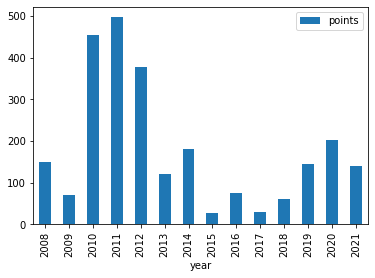

In [98]:
mcl_points = sqlc.sql("""
    SELECT sum(constructor_results.points) AS points, races.year
    FROM constructor_results, races
    WHERE constructorId == 1
        AND races.raceId == constructor_results.raceId
        AND races.year >= 2008
    GROUP BY races.year
    ORDER BY races.year ASC
""")

mcl_points.toPandas() \
    .plot \
    .bar(x = 'year',
             y = 'points')

It's important to note that point awarding changed after 2010, whcih is why we see a very big uptick in the number of points McLaren has scored since. However, we do see a big dip in number of point scored, which has started going back up in the past 3 seasons. The 2021 season is still underway, but we can clearly see that McLaren has already outscored 5 of their past 9 seasons. 

In [100]:
sqlc.sql("""
    SELECT sum(constructor_results.points) AS points, constructors.name, races.year
    FROM constructor_results, races, constructors
    WHERE constructor_results.constructorId == constructors.constructorId
        AND races.raceId == constructor_results.raceId
        AND races.year >= 2010
    GROUP BY constructors.name, races.year
    ORDER BY races.year ASC,  points DESC
""").show()

+------+-----------+----+
|points|       name|year|
+------+-----------+----+
| 498.0|   Red Bull|2010|
| 454.0|    McLaren|2010|
| 396.0|    Ferrari|2010|
| 214.0|   Mercedes|2010|
| 163.0|    Renault|2010|
|  69.0|   Williams|2010|
|  68.0|Force India|2010|
|  44.0|     Sauber|2010|
|  13.0| Toro Rosso|2010|
|   0.0|     Virgin|2010|
|   0.0|        HRT|2010|
|   0.0|      Lotus|2010|
| 650.0|   Red Bull|2011|
| 497.0|    McLaren|2011|
| 375.0|    Ferrari|2011|
| 165.0|   Mercedes|2011|
|  73.0|    Renault|2011|
|  69.0|Force India|2011|
|  44.0|     Sauber|2011|
|  41.0| Toro Rosso|2011|
+------+-----------+----+
only showing top 20 rows



## Pit crew performance 

We can also take a look at how well the team's pit crew was performing over that period. We know that pit stops are an integral part of the race, so it is important to investigate every avenue when looking at where the performance dipped. 

In [102]:
sqlc.sql("""
    SELECT * 
    FROM pit_stops
""").show()

+------+--------+----+---+--------+--------+------------+
|raceId|driverId|stop|lap|    time|duration|milliseconds|
+------+--------+----+---+--------+--------+------------+
|   841|     153|   1|  1|17:05:23|  26.898|       26898|
|   841|      30|   1|  1|17:05:52|  25.021|       25021|
|   841|      17|   1| 11|17:20:48|  23.426|       23426|
|   841|       4|   1| 12|17:22:34|  23.251|       23251|
|   841|      13|   1| 13|17:24:10|  23.842|       23842|
|   841|      22|   1| 13|17:24:29|  23.643|       23643|
|   841|      20|   1| 14|17:25:17|  22.603|       22603|
|   841|     814|   1| 14|17:26:03|  24.863|       24863|
|   841|     816|   1| 14|17:26:50|  25.259|       25259|
|   841|      67|   1| 15|17:27:34|  25.342|       25342|
|   841|       2|   1| 15|17:27:41|  22.994|       22994|
|   841|       1|   1| 16|17:28:24|  23.227|       23227|
|   841|     808|   1| 16|17:28:39|  24.535|       24535|
|   841|       3|   1| 16|17:29:00|  23.716|       23716|
|   841|     1

In [104]:
sqlc.sql("""
    SELECT pit_stops.raceId, pit_stops.driverId, constructors.name, pit_stops.duration, pit_stops.milliseconds, pit_stops.stop, pit_stops.lap
    FROM pit_stops, constructors, results
    WHERE constructors.constructorId == results.constructorId
""").show()

+------+--------+-------+--------+------------+----+---+
|raceId|driverId|   name|duration|milliseconds|stop|lap|
+------+--------+-------+--------+------------+----+---+
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.898|       26898|   1|  1|
|   841|     153|McLaren|  26.8

In [117]:
sqlc.sql("""
    SELECT pit_stops.raceId, pit_stops.driverId, duration, pit_stops.milliseconds, stop, lap, results.constructorId
    FROM pit_stops, results, races
    WHERE results.raceId == pit_stops.raceId
""").show()

+------+--------+--------+------------+----+---+-------------+
|raceId|driverId|duration|milliseconds|stop|lap|constructorId|
+------+--------+--------+------------+----+---+-------------+
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|          164|
|   841|     153|  26.898|       26898|   1|  1|       

In [180]:
sqlc.sql("""
    SELECT concat(drivers.forename, ' ', drivers.surname) AS driver_name, constructors.name, pit_stops.milliseconds, results.raceId
    FROM results, pit_stops, drivers, constructors, races
    WHERE results.driverId == pit_stops.driverId
        AND drivers.driverId == pit_stops.driverId
        AND constructors.constructorId == results.constructorId
        AND races.raceId == pit_stops.raceId
        AND races.year >= 2008
    ORDER BY driver_name, raceId
""").show(1000)

+------------+-----------+------------+------+
| driver_name|       name|milliseconds|raceId|
+------------+-----------+------------+------+
|Adrian Sutil|Force India|       89401|     1|
|Adrian Sutil|Force India|       22227|     1|
|Adrian Sutil|Force India|       25274|     1|
|Adrian Sutil|Force India|       22277|     1|
|Adrian Sutil|Force India|       23732|     1|
|Adrian Sutil|Force India|       40747|     1|
|Adrian Sutil|Force India|       22931|     1|
|Adrian Sutil|Force India|       24853|     1|
|Adrian Sutil|Force India|       24314|     1|
|Adrian Sutil|Force India|       19591|     1|
|Adrian Sutil|Force India|       25293|     1|
|Adrian Sutil|Force India|       20306|     1|
|Adrian Sutil|Force India|       22346|     1|
|Adrian Sutil|Force India|       23779|     1|
|Adrian Sutil|Force India|       25493|     1|
|Adrian Sutil|Force India|       22199|     1|
|Adrian Sutil|Force India|       26495|     1|
|Adrian Sutil|Force India|       25998|     1|
|Adrian Sutil

In [ ]:
sqlc.sql("""
    SELECT round(sum(pit_stops.milliseconds), 3) AS mean_pitstop, concat(drivers.forename, ' ', drivers.surname) AS driver_name, constructors.name
    FROM results, pit_stops, drivers, constructors, races
    WHERE results.driverId == pit_stops.driverId
        AND drivers.driverId == pit_stops.driverId
        AND constructors.constructorId == results.constructorId
        AND races.raceId == pit_stops.raceId
        AND races.year >= 2008
    GROUP BY driver_name, constructors.name
    ORDER BY driver_name
""").show()